# Hierarchical Clustering
- Aim is to produce a hierarchical series of nested clusters. A diagram called Dendrogram.

- **Hierarchical** Clustering performs **better** than **K-Means** on **Small** dataset

### Dendrogram :

-  graphical representation of hierarchy, It is an inverted tree that describes the order in which factors( Clusters ) are merged (bottom-up view) <br>

- **The Height of branch, represents the distance between two points.**
- **The height represents, Similarity between two or more points/ clusters**

<img src='https://beginningwithml.files.wordpress.com/2019/04/q20_b.png' alt='Clustering image'>

### Dendrogram Threshold:
- **Based on Within-cluster variance**

- It is the Upper bound of Distance at which, formation of Cluster is allowed or Similarity above the threshold is not considered.
- Number of lines crossing the Threshold, mark the Number of outer cluster to be formed.

- **It is a guide that helps us decide the Optimal number of Clusters**

- It is decided by moving A Horizontal line verticaly on the dendogram, The largest distance where the line can move without touching another Hoizontal line in the dendrogram, is where the thereshold lies.  

<img src='https://miro.medium.com/v2/resize:fit:1400/1*xaieGtc6j14Q5QWDcXxcXw.png' alt='Threshold image' width='70%'>
<hr>

**Advantages over Other Clustering methords**
- The ability to handle non-convex clusters and clusters of different sizes and densities.
- The ability to handle missing data and noisy data.
- The ability to reveal the hierarchical structure of the data, which can be useful for understanding the relationships among the clusters.
<hr>

### Types of Hierarchical Clustering
<img src='https://miro.medium.com/v2/resize:fit:1400/1*XSPHjdQQGCHwPNtMqznP7g.png' alt='Types of Hierarical clustering'>

**Steps for Agglomerative HC**
1. Make each data point a single-point clustser ---> 'N' clusters
2. Take two closest data point and make them one cluster, ---> 'N-1' clusters
3. Take two cllosest clusters and make them one, ---> 'N-2' clusters
4. Repeate STEP 3 until there is only one cluster left.

**The Importent point to note in Distance detween Clusters.**
- There is distance between Points
- There is Distance between Clusters
    1. Option 1: Closest Ponits
    1. Option 2: Furthest points
    3. Option 3: Average Distance
    4. Option 4: Distance Between Centroids of two clusters

<br>The Distance is **Euclidean Distance**.
    $$ Distance = d(p_1,p_2) = \sqrt{ (x_2 - x_1)^2 + (y_2 - y_1)^2}$$

## Pre-processing

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# importing the dataset
dataset = pd.read_csv('./cluster_dataset/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

### Using Denrogram to find optimal No. of clusters.

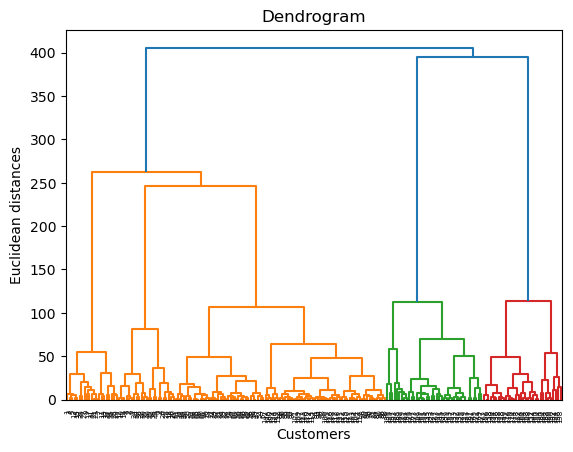

In [5]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) 
# Methord = 'ward' is used to minimize the variance of the clusters

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# As we can see from the dendrogram, the optimal number of clusters is 5, 
#  but 3 Is also possible

### Implementing the Hierarchical Clustering (No.clusters = 3, 5)

In [11]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

### Visualizing the dataset

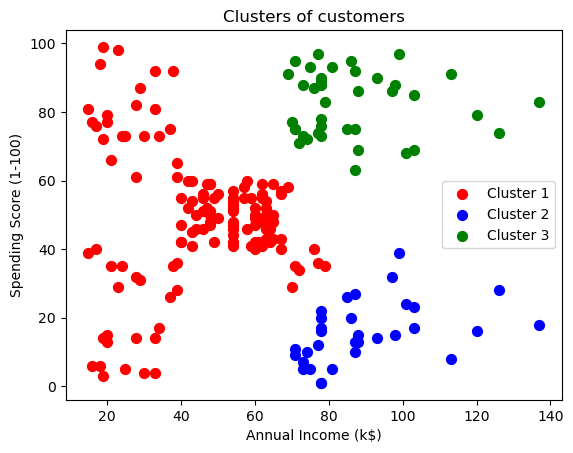

In [12]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

- Looks like, 5 Cluster is more optimal complared to 3, but Cluste 1 may have split in 3 more cluster, where the difference in the similary in not very large.

<img src='https://miro.medium.com/v2/resize:fit:1400/1*j_R4Riw4gnuJ3p1l2xzruQ.png' width='50%'>

<img src='https://media.licdn.com/dms/image/C5112AQG5QhHMXliAoQ/article-cover_image-shrink_600_2000/0/1566363386940?e=2147483647&v=beta&t=F-uBPK1Jx5HYtqYfGjlOAlb1jtnsuayMZkULeRYcG9o'>